<a href="https://colab.research.google.com/github/rajeshpahari/Deep-Learning/blob/main/Pytorch_Cross_Validation_Scikitlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
#Import Libraries
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [54]:
################Import Datasets
import seaborn as sns
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [55]:
##########Convert iris in tensor

data=torch.tensor(iris[iris.columns[0:4]].values).float()

labels=torch.zeros(len(data),dtype=torch.long)

labels[iris.species=='versicolor']=1
labels[iris.species=='virginica']=2
#labels

In [56]:
#####################Create Model
def createModel():

  #Model Architecture
  ANNClass=nn.Sequential(
      nn.Linear(4,64),
      nn.ReLU(),
      nn.Linear(64,64),
      nn.ReLU(),
      nn.Linear(64,3)

  )


  #Loss func
  lossfunc=nn.CrossEntropyLoss()

  #optimizer
  optimizer=torch.optim.SGD(ANNClass.parameters(),lr=.01)
  return ANNClass,lossfunc,optimizer  

In [61]:
################Train The Model
numepochs=200
####Create train function
def trainModel(trainprop):

  #Initialize loss,training accuracy & test accuracy
  losses=torch.zeros(numepochs)
  trainacc=[]
  testacc=[]
  X=data
  y=labels 
  #Create train data unique for each epoch
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=trainprop)


  #Loop for training
  for epochi in range(numepochs):

    
    #forward pass
    yHat=ANNClass(X_train)

    #calculate LOss
    loss=lossfunc(yHat,y_train)
    losses[epochi]=loss

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    ##Calculate Accuracy
    #Training accuracy
    trainacc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y_train).float()))

    #test Accuracy
    predlabels=torch.argmax(ANNClass(X_test),axis=1)
    testacc.append(100*torch.mean((predlabels==y_test).float()))
    #testacc.append(100*troch.mean((torch.argmax(ANNClass(X_test),axis=1)==y_test).float()).item)

  return trainacc,testacc







In [62]:
#################Run the model
ANNClass,lossfunc,optimizer=createModel()
trainacc,testacc=trainModel(.8)


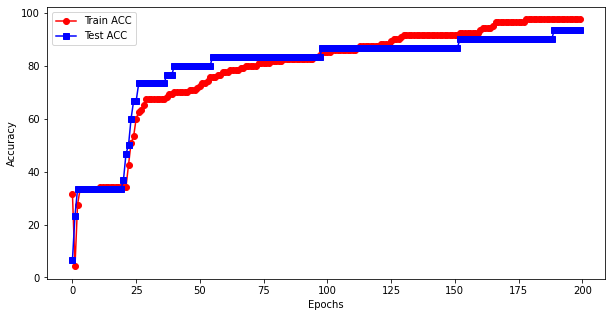

In [64]:
########## Plot the result

fig=plt.figure(figsize=(10,5))

plt.plot(trainacc,'ro-')
plt.plot(testacc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train ACC','Test ACC'])
plt.show()